In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier

In [25]:
comp_data= pd.read_csv('Company_Data.csv')

In [26]:
comp_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [27]:
comp_data.shape

(400, 11)

In [28]:
comp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [29]:
comp_data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [30]:
comp_data['Sales_range']=pd.cut(comp_data.Sales, bins=[0,3,5,7,20], labels=['low','medium','regular','high'])

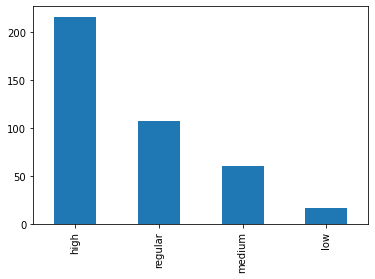

high       216
regular    107
medium      60
low         16
Name: Sales_range, dtype: int64


In [31]:
comp_data['Sales_range'].value_counts(sort=True).plot.bar()
plt.show()
print(comp_data['Sales_range'].value_counts())

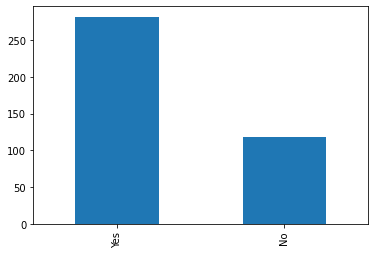

Yes    282
No     118
Name: Urban, dtype: int64


In [32]:
comp_data['Urban'].value_counts(sort=True).plot.bar()
plt.show()
print(comp_data['Urban'].value_counts())

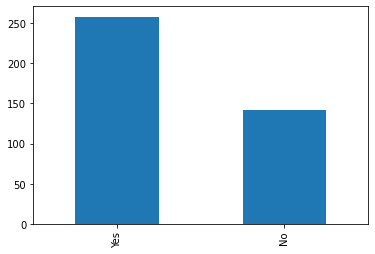

Yes    258
No     142
Name: US, dtype: int64


In [33]:
comp_data['US'].value_counts(sort=True).plot.bar()
plt.show()
print(comp_data['US'].value_counts())

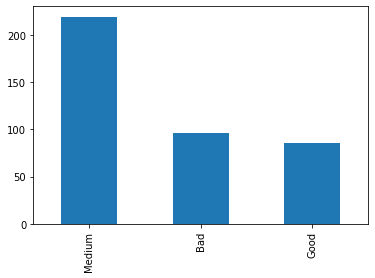

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64


In [34]:
comp_data['ShelveLoc'].value_counts(sort=True).plot.bar()
plt.show()
print(comp_data['ShelveLoc'].value_counts())

In [35]:
label_encoder = preprocessing.LabelEncoder()
comp_data['Urban']= label_encoder.fit_transform(comp_data['Urban'])
comp_data['US']= label_encoder.fit_transform(comp_data['US'])

In [36]:
comp_data=pd.get_dummies(comp_data, columns=['ShelveLoc'])

In [37]:
comp_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US,Sales_range,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium
0,9.50,138,73,11,276,120,42,17,1,1,high,1,0,0
1,11.22,111,48,16,260,83,65,10,1,1,high,0,1,0
2,10.06,113,35,10,269,80,59,12,1,1,high,0,0,1
3,7.40,117,100,4,466,97,55,14,1,1,high,0,0,1
4,4.15,141,64,3,340,128,38,13,1,0,medium,1,0,0


In [38]:
comp_data= comp_data.drop(columns={'Sales'},axis=1)

In [39]:
comp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   CompPrice         400 non-null    int64   
 1   Income            400 non-null    int64   
 2   Advertising       400 non-null    int64   
 3   Population        400 non-null    int64   
 4   Price             400 non-null    int64   
 5   Age               400 non-null    int64   
 6   Education         400 non-null    int64   
 7   Urban             400 non-null    int32   
 8   US                400 non-null    int32   
 9   Sales_range       399 non-null    category
 10  ShelveLoc_Bad     400 non-null    uint8   
 11  ShelveLoc_Good    400 non-null    uint8   
 12  ShelveLoc_Medium  400 non-null    uint8   
dtypes: category(1), int32(2), int64(7), uint8(3)
memory usage: 26.9 KB


comp_data=comp_data.dropna()

In [44]:
comp_data=comp_data.dropna()

In [45]:
comp_data.columns

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age',
       'Education', 'Urban', 'US', 'Sales_range', 'ShelveLoc_Bad',
       'ShelveLoc_Good', 'ShelveLoc_Medium'],
      dtype='object')

In [46]:
X= comp_data[['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age',
       'Education', 'Urban', 'US', 'ShelveLoc_Bad',
       'ShelveLoc_Good', 'ShelveLoc_Medium']]
Y=comp_data['Sales_range']

In [47]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=5,oob_score=True,n_estimators=50,criterion="entropy")

In [48]:
rf.fit(X,Y) 
rf.estimators_  
rf.classes_ 
rf.n_classes_
rf.n_features_ 

rf.n_outputs_ 

rf.oob_score_

0.6240601503759399

In [49]:
comp_data['rf_pred'] = rf.predict(X)
cols = ['rf_pred',' Sales_range']

In [50]:
comp_data.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US,Sales_range,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,rf_pred
0,138,73,11,276,120,42,17,1,1,high,1,0,0,high
1,111,48,16,260,83,65,10,1,1,high,0,1,0,high
2,113,35,10,269,80,59,12,1,1,high,0,0,1,high
3,117,100,4,466,97,55,14,1,1,high,0,0,1,high
4,141,64,3,340,128,38,13,1,0,medium,1,0,0,medium


In [51]:
comp_data["Sales_range"]

0         high
1         high
2         high
3         high
4       medium
        ...   
395       high
396    regular
397       high
398    regular
399       high
Name: Sales_range, Length: 399, dtype: category
Categories (4, object): ['low' < 'medium' < 'regular' < 'high']

In [52]:
from sklearn.metrics import confusion_matrix

In [53]:
confusion_matrix(comp_data["Sales_range"],comp_data['rf_pred'])

array([[216,   0,   0,   0],
       [  0,  16,   0,   0],
       [  0,   0,  60,   0],
       [  0,   0,   0, 107]], dtype=int64)

In [54]:
pd.crosstab(comp_data["Sales_range"],comp_data["rf_pred"])

rf_pred,high,low,medium,regular
Sales_range,,,,
low,0,16,0,0
medium,0,0,60,0
regular,0,0,0,107
high,216,0,0,0


In [86]:
data= pd.read_csv('Fraud_check.csv')

In [87]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [88]:
data.shape

(600, 6)

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [90]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


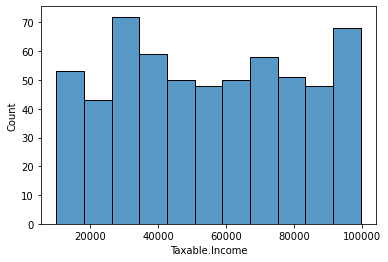

In [91]:
import seaborn as sns
sns.histplot(data['Taxable.Income']);


In [92]:
data = data.rename(columns={'Marital.Status':'marital_status','Taxable.Income':'taxable_income','City.Population':'city_population','Work.Experience':'work_exp',})
data

,Undergrad,marital_status,taxable_income,city_population,work_exp,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [93]:
data['is_Check']= ['Risky' if x <= 30000 else 'Good' for x in data['taxable_income']]

In [94]:
data

,Undergrad,marital_status,taxable_income,city_population,work_exp,Urban,is_Check
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [95]:
lable_encoder = preprocessing.LabelEncoder()
data['Risky'] = lable_encoder.fit_transform(data['is_Check'])

In [96]:
data['Mar_status'] = lable_encoder.fit_transform(data.marital_status)

In [97]:
data['Graduate'] = lable_encoder.fit_transform(data.Undergrad)

In [98]:
data['urban'] = lable_encoder.fit_transform(data.Urban)

In [99]:
data

,Undergrad,marital_status,taxable_income,city_population,work_exp,Urban,is_Check,Risky,Mar_status,Graduate,urban
0,NO,Single,68833,50047,10,YES,Good,0,2,0,1
1,YES,Divorced,33700,134075,18,YES,Good,0,0,1,1
2,NO,Married,36925,160205,30,YES,Good,0,1,0,1
3,YES,Single,50190,193264,15,YES,Good,0,2,1,1
4,NO,Married,81002,27533,28,NO,Good,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good,0,0,1,1
596,YES,Divorced,69967,55369,2,YES,Good,0,0,1,1
597,NO,Divorced,47334,154058,0,YES,Good,0,0,0,1
598,YES,Married,98592,180083,17,NO,Good,0,1,1,0


In [100]:
data1 = data.drop(['Undergrad','marital_status','Urban','is_Check','taxable_income'],axis=1)

In [101]:
data1=data[['city_population','work_exp',"Mar_status",'Graduate','urban','Risky']]
data1

,city_population,work_exp,Mar_status,Graduate,urban,Risky
0,50047,10,2,0,1,0
1,134075,18,0,1,1,0
2,160205,30,1,0,1,0
3,193264,15,2,1,1,0
4,27533,28,1,0,0,0
...,...,...,...,...,...,...
595,39492,7,0,1,1,0
596,55369,2,0,1,1,0
597,154058,0,0,0,1,0
598,180083,17,1,1,0,0


In [102]:
X = data1.iloc[:,0:5]
Y = data1.iloc[:,5]

In [103]:
X

,city_population,work_exp,Mar_status,Graduate,urban
0,50047,10,2,0,1
1,134075,18,0,1,1
2,160205,30,1,0,1
3,193264,15,2,1,1
4,27533,28,1,0,0
...,...,...,...,...,...
595,39492,7,0,1,1
596,55369,2,0,1,1
597,154058,0,0,0,1
598,180083,17,1,1,0


In [104]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Risky, Length: 600, dtype: int32

In [105]:
data1['Risky'].unique()

array([0, 1])

In [106]:
data1['Risky'].value_counts()

0    476
1    124
Name: Risky, dtype: int64

In [107]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=5,oob_score=True,n_estimators=60,criterion="entropy")

In [108]:
rf.fit(X,Y) 
rf.estimators_  
rf.classes_
rf.n_classes_  
rf.n_features_  

rf.n_outputs_ 

rf.oob_score_ 
rf.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [112]:
rf.oob_score_ 

0.745

In [113]:
rf.n_features_ 

5

In [116]:
data1['rf_pred'] = rf.predict(X)

<ipython-input-116-ec70633bc080>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['rf_pred'] = rf.predict(X)


In [117]:
cols = ['rf_pred','Risky']

In [118]:
data1[cols].head()

,rf_pred,Risky
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [119]:
data1["Risky"]

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Risky, Length: 600, dtype: int32

In [123]:
data1

,city_population,work_exp,Mar_status,Graduate,urban,Risky,rf_pred
0,50047,10,2,0,1,0,0
1,134075,18,0,1,1,0,0
2,160205,30,1,0,1,0,0
3,193264,15,2,1,1,0,0
4,27533,28,1,0,0,0,0
...,...,...,...,...,...,...,...
595,39492,7,0,1,1,0,0
596,55369,2,0,1,1,0,0
597,154058,0,0,0,1,0,0
598,180083,17,1,1,0,0,0


In [120]:
from sklearn.metrics import confusion_matrix

In [125]:
confusion_matrix(data1["Risky"],data1["rf_pred"])

array([[476,   0],
       [  1, 123]], dtype=int64)

In [126]:
pd.crosstab(data1["Risky"],data1["rf_pred"])

rf_pred,0,1
Risky,,
0,476,0
1,1,123


In [127]:
print("Accuracy",(476+123)/(476+123+0+1)*100)

Accuracy 99.83333333333333
